## Step 0 - Libraries Importing

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

## Step 1 -  Dataset Importing

In [160]:
df = pd.read_csv('data.csv', sep=r'\t', engine='python')
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,None
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


## Step 2 - Data Cleaning 
1- I'll unify columns names to make it easier to work on.

2- I'll drop more than 85 columns as the project doesn't need to be that precise regarding the timing of the answer for each question

In [161]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df

,q1a,q1i,q1e,q2a,q2i,q2e,q3a,q3i,q3e,q4a,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,None
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


In [162]:
df['q0i'] = 0
df['q0e'] = 0


In [164]:
for y in range (42):
    x = "q{x}e".format(x = y)
    df = df.drop([x], axis = 1)

In [229]:
df.isna().sum().sum()

0

In [224]:
df.columns

Index(['q1a', 'q2a', 'q3a', 'q4a', 'q5a', 'q6a', 'q7a', 'q8a', 'q9a', 'q10a',
       'q11a', 'q12a', 'q13a', 'q14a', 'q15a', 'q16a', 'q17a', 'q18a', 'q19a',
       'q20a', 'q21a', 'q22a', 'q23a', 'q24a', 'q25a', 'q26a', 'q27a', 'q28a',
       'q29a', 'q30a', 'q31a', 'q32a', 'q33a', 'q34a', 'q35a', 'q36a', 'q37a',
       'q38a', 'q39a', 'q40a', 'q41a', 'q42a', 'q42i', 'q42e', 'country',
       'tipi1', 'tipi2', 'tipi3', 'tipi4', 'tipi5', 'tipi6', 'tipi7', 'tipi8',
       'tipi9', 'tipi10', 'vcl1', 'vcl2', 'vcl3', 'vcl4', 'vcl5', 'vcl6',
       'vcl7', 'vcl8', 'vcl9', 'vcl10', 'vcl11', 'vcl12', 'vcl13', 'vcl14',
       'vcl15', 'vcl16', 'education', 'urban', 'gender', 'engnat', 'age',
       'religion', 'race', 'married', 'familysize'],
      dtype='object')

In [225]:
df = df.drop(['source', 'introelapse', 'testelapse', 'surveyelapse', 'screensize', 'uniquenetworklocation', 'hand', 'orientation','voted', 'major'], axis = 1)

KeyError: "['source' 'introelapse' 'testelapse' 'surveyelapse' 'screensize'\n 'uniquenetworklocation' 'hand' 'orientation' 'voted' 'major'] not found in axis"

In [227]:
df = df.dropna()

In [228]:
df

,q1a,q2a,q3a,q4a,q5a,q6a,q7a,q8a,q9a,q10a,...,vcl16,education,urban,gender,engnat,age,religion,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,2,16,12,10,1,2
1,4,1,2,3,4,4,3,4,3,2,...,1,2,3,2,1,16,7,70,1,4
2,3,1,4,1,4,3,1,3,2,4,...,1,2,3,2,2,17,4,60,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,1,13,4,70,1,5
4,2,2,3,4,4,2,4,4,4,3,...,1,3,2,2,2,19,10,10,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,1,2,2,1,1,16,2,60,1,2
39771,3,4,3,4,3,4,4,4,3,4,...,1,3,2,1,2,21,10,10,1,4
39772,2,1,2,1,1,1,1,1,2,1,...,1,3,2,2,1,48,7,30,2,3
39773,3,1,2,2,3,3,3,4,3,1,...,1,3,2,2,1,20,6,60,1,2


## Step 3 - Exploratory Data Analysis

In [177]:
df.groupby('religion')[['race']].count().reset_index().sort_values('religion')

,religion,race
0,0,356
1,1,3244
2,2,3845
3,3,526
4,4,3097
5,5,122
6,6,1544
7,7,2254
8,8,700
9,9,144


In [178]:
df.describe()

,q1a,q2a,q3a,q4a,q5a,q6a,q7a,q8a,q9a,q10a,...,vcl16,education,urban,gender,engnat,age,religion,race,married,familysize
count,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,...,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000,39773.000000
mean,2.619541,2.172202,2.226058,1.950167,2.521459,2.540216,1.924949,2.480376,2.669625,2.447314,...,0.930883,2.503834,2.220250,1.789556,1.635884,23.611797,7.556131,31.311442,1.159505,3.510321
std,1.032107,1.111545,1.038514,1.042244,1.069882,1.049692,1.033544,1.052431,1.067882,1.139329,...,0.253657,0.885429,0.804771,0.444172,0.483897,21.582060,3.554259,25.871122,0.445797,2.141557
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,10.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,18.000000,4.000000,10.000000,1.000000,2.000000
50%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,1.000000,3.000000,2.000000,2.000000,2.000000,21.000000,10.000000,10.000000,1.000000,3.000000
75%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,1.000000,3.000000,3.000000,2.000000,2.000000,25.000000,10.000000,60.000000,1.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,4.000000,3.000000,3.000000,2.000000,1998.000000,12.000000,70.000000,3.000000,133.000000


In [223]:
df.corr().sort_values('familysize', ascending = False)

,q1a,q2a,q3a,q4a,q5a,q6a,q7a,q8a,q9a,q10a,...,vcl16,education,urban,gender,engnat,age,religion,race,married,familysize
familysize,0.008761,0.040664,-0.037526,-0.009739,-0.067577,-0.019560,-0.003154,-0.073452,0.001766,-0.038655,...,-0.048513,0.123684,-0.093229,0.068471,0.177493,0.021685,0.295498,-0.231998,0.020424,1.000000
religion,0.047508,0.081685,-0.054679,0.004712,-0.128540,-0.001004,0.009398,-0.113748,0.041937,-0.063575,...,-0.089389,0.202060,-0.007812,0.146840,0.369481,-0.019441,1.000000,-0.472620,-0.041783,0.295498
engnat,0.024728,0.057536,-0.044341,-0.033137,-0.114481,-0.028096,-0.039459,-0.104282,0.026884,-0.029598,...,-0.052636,0.195740,0.023480,0.049758,1.000000,-0.037623,0.369481,-0.424515,-0.132179,0.177493
education,-0.105293,-0.053873,-0.102237,-0.127957,-0.139970,-0.108031,-0.155318,-0.114492,-0.117472,-0.130421,...,-0.007384,1.000000,-0.022498,0.004034,0.195740,0.159183,0.202060,-0.187935,0.173559,0.123684
tipi10,0.105273,0.077885,0.092790,0.037379,0.054647,0.072179,0.044433,0.030493,0.091837,0.111119,...,-0.046158,0.010024,-0.008885,0.028331,0.132320,-0.031557,0.166183,-0.170610,-0.079231,0.096956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vcl3,-0.065639,-0.071714,0.016814,-0.028071,0.073512,-0.039571,-0.022568,0.061226,-0.074737,0.013584,...,0.041575,0.001246,-0.015327,-0.054370,-0.255395,0.097076,-0.320742,0.313972,0.173084,-0.160021
vcl2,-0.056208,-0.070681,-0.005462,-0.030730,0.076137,-0.032924,-0.032587,0.053318,-0.043356,0.013416,...,0.192182,-0.028905,-0.001038,-0.076693,-0.240936,0.052516,-0.332409,0.283287,0.096383,-0.165363
vcl14,-0.028901,-0.045333,0.030329,0.005947,0.108654,0.000371,0.005525,0.079480,-0.017095,0.050127,...,0.211190,-0.092337,0.024494,-0.109202,-0.245060,0.029213,-0.347709,0.299564,0.055333,-0.204240
vcl13,-0.083666,-0.092393,0.018143,-0.046309,0.102614,-0.058464,-0.045396,0.076255,-0.089804,0.032427,...,0.101909,-0.050893,-0.017472,-0.206720,-0.349668,0.080690,-0.435196,0.380177,0.141613,-0.212359


<AxesSubplot:>

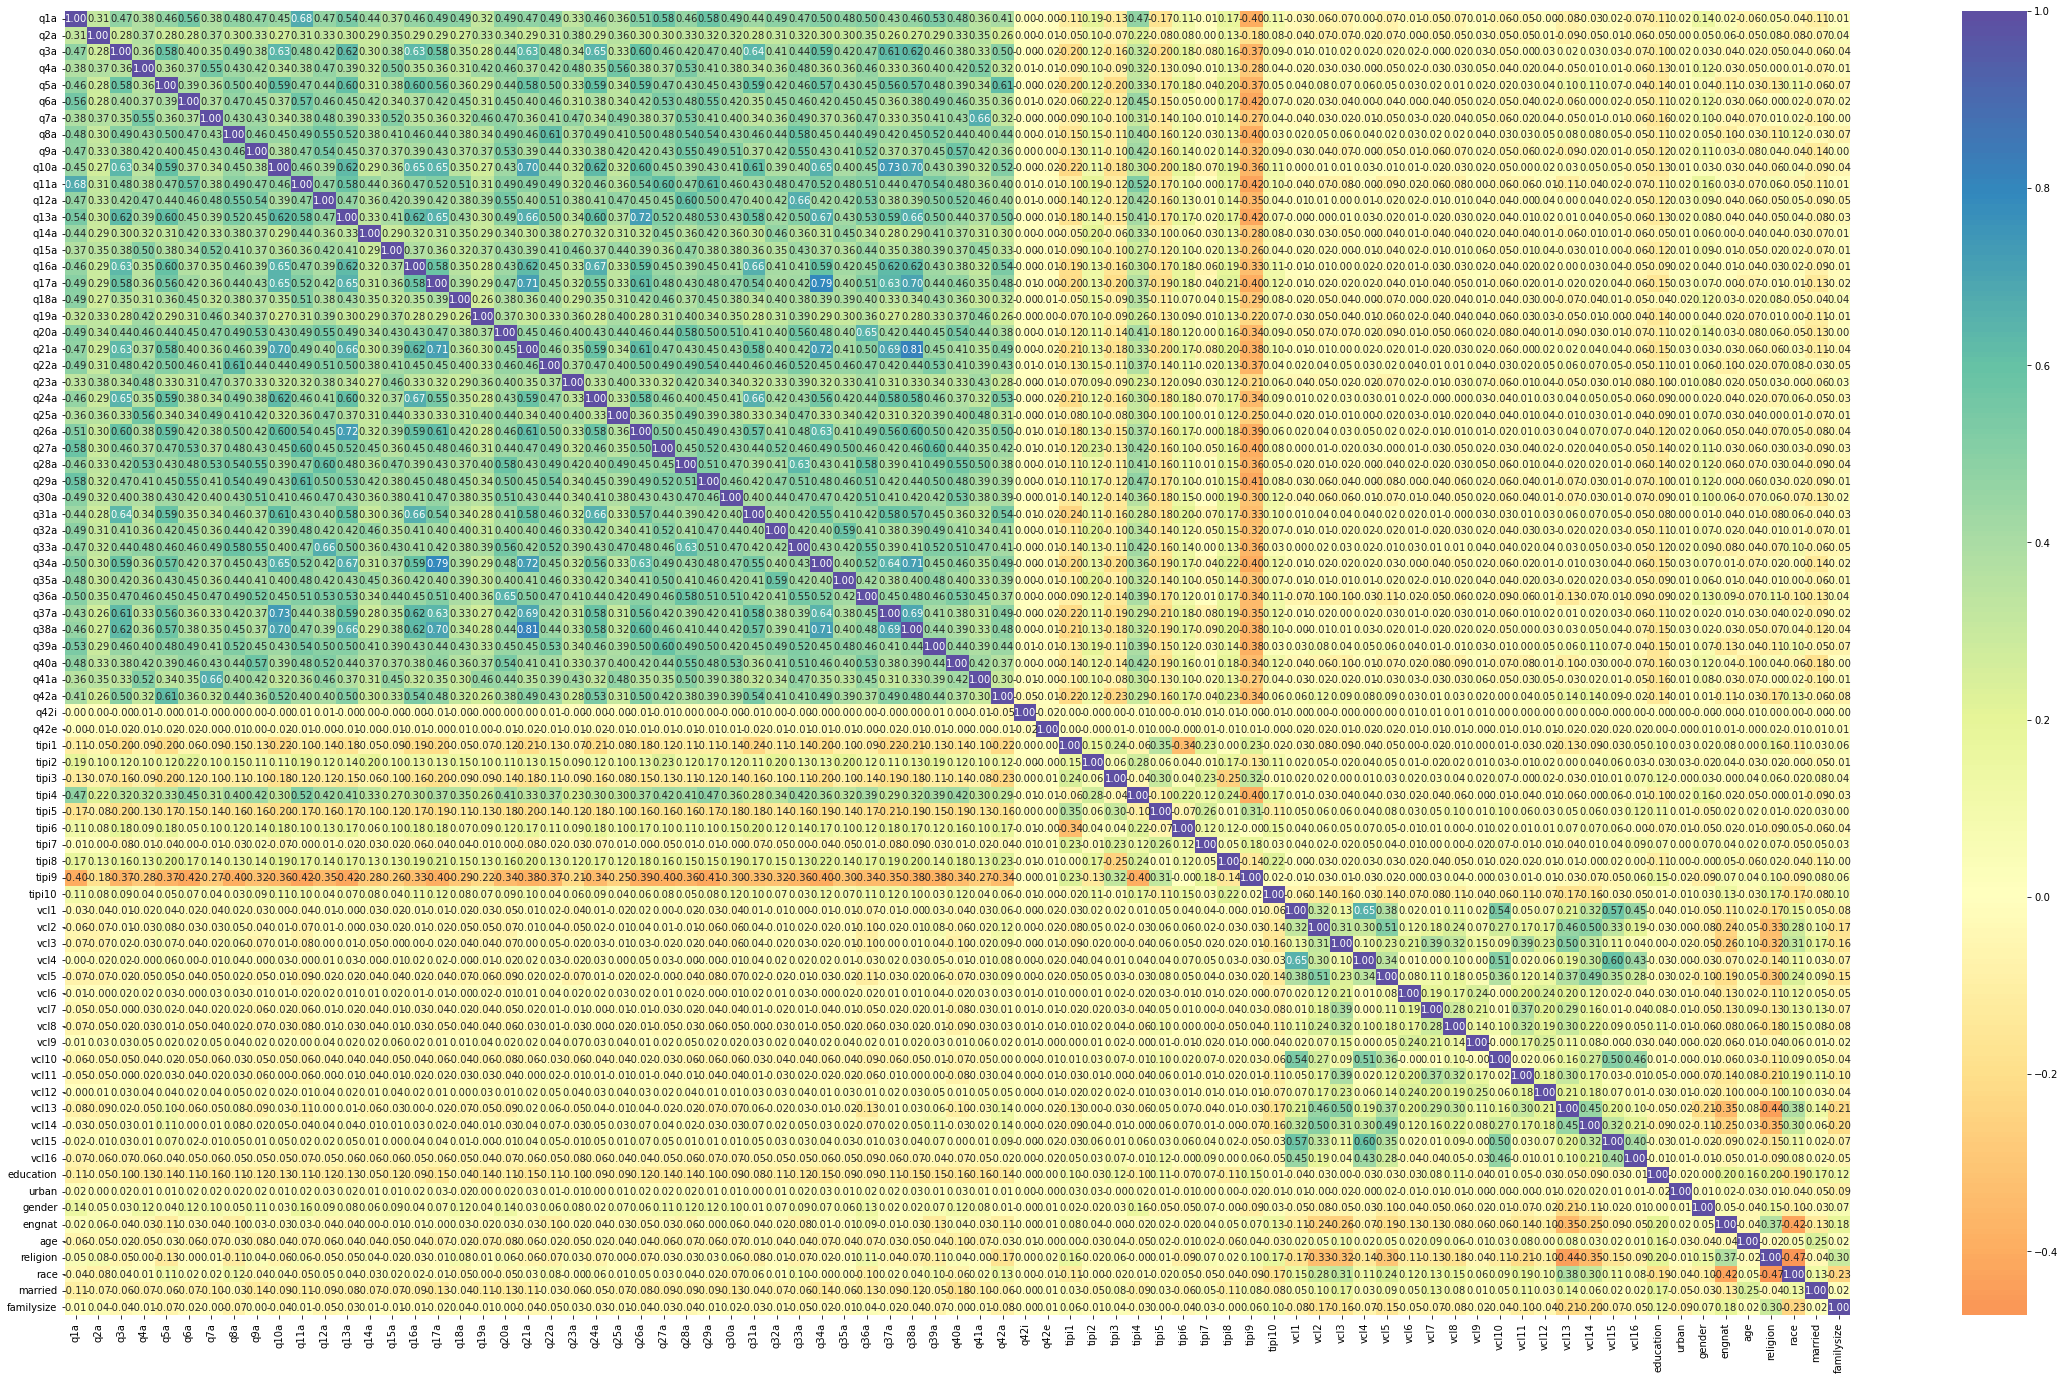

In [238]:
plt.figure(figsize=(40,24))
sns.heatmap(df.corr(), cmap='Spectral', annot=True, fmt='.2f', center=0)

## Step 4 - Modelling

## Step 5 - Conclusion